In [2]:
from google.colab import files
uploaded = files.upload()

Saving sentiment140.csv to sentiment140.csv


In [3]:
import pandas as pd
df = pd.read_csv("/content/sentiment140.csv", encoding="ISO-8859-1", header=None)
df.columns = ["Sentiment", "ID", "Date", "Query", "User", "Tweet"]
print(df.head(5))

   Sentiment          ID                          Date     Query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              User                                              Tweet  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [4]:
news_keywords = [
    "breaking", "news", "report", "announces", "update", "headline", "exclusive",
    "alert", "developing", "reveals", "confirms", "statement", "official",
    "press release", "declares", "exposes", "investigation", "insight",
    "coverage", "highlights", "releases", "revealed", "scandal", "leak",
    "crisis", "policy", "government", "authority", "emergency", "forecast",
    "election", "poll", "interview", "speech", "breaking news", "top story"
]

news_tweets = df[df["Tweet"].str.contains("|".join(news_keywords), case=False, na=False)]

In [5]:
news_tweets = news_tweets[~news_tweets["Tweet"].str.startswith("RT")]  # Remove retweets
news_tweets = news_tweets[~news_tweets["Tweet"].str.contains("@")]  # Remove replies
print('News Headlnes Obtained=', len(news_tweets))

News Headlnes Obtained= 17643


In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download("vader_lexicon")

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply VADER on extracted news headlines tweets
news_tweets["vader_sentiment"] = news_tweets["Tweet"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Classify Sentiment
news_tweets["vader_label"] = news_tweets["vader_sentiment"].apply(lambda x: "positive" if x > 0.05 else ("negative" if x < -0.05 else "neutral"))

print(news_tweets[["Tweet", "vader_sentiment", "vader_label"]].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                 Tweet  vader_sentiment  \
1    is upset that he can't update his Facebook by ...          -0.7500   
48   is strangely sad about LiLo and SamRo breaking...          -0.6486   
200  Job Interview in Cardiff today, wish me luck! ...           0.7177   
227   What tragedy and disaster in the news this week           -0.8591   
327  ..and of course... I have access to my Halo 3 ...          -0.6956   

    vader_label  
1      negative  
48     negative  
200    positive  
227    negative  
327    negative  


<ipython-input-7-6515c74fe0b6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=news_tweets["vader_label"], palette="coolwarm")


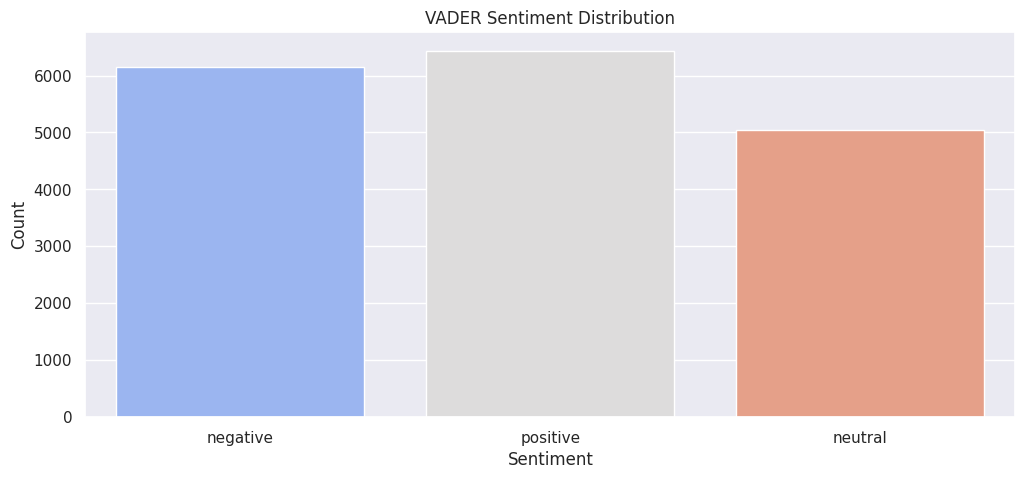

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="darkgrid")

# Plot VADER Sentiment Distribution
plt.figure(figsize=(12, 5))
sns.countplot(x=news_tweets["vader_label"], palette="coolwarm")
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

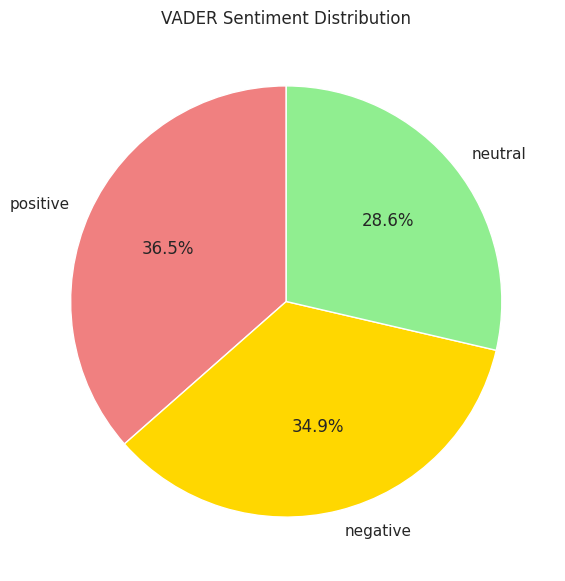

In [8]:
# Pie chart for VADER sentiment
plt.figure(figsize=(7, 7))
news_tweets["vader_label"].value_counts().plot.pie(
    autopct="%1.1f%%", colors=["lightcoral", "gold", "lightgreen"], startangle=90
)
plt.title("VADER Sentiment Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

In [9]:
import pickle
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Save the VADER object
with open("vader_model.pkl", "wb") as f:
    pickle.dump(sia, f)